In [1]:
import tslearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans 
from tslearn import metrics
from tslearn.preprocessing import TimeSeriesScalerMinMax

import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 0
np.random.seed(seed)

In [3]:
stocks_df = pd.read_csv("data/stocks.csv")

In [4]:
stocks_df

,date,Addoha,AFMA,Afric Indus,Afriquia Gaz,Agma,Alliances,Aluminium Maroc,Aradei Capital,ATLANTASANAD,...,SRM,Ste Boissons,STROC Indus,TAQA Morocco,Timar,Total Maroc,Unimer,Wafa Assur,Zellidja,MASI
0,16/01/2017,54.87,822.5,315.35,NaN,NaN,128.00,1150.0,NaN,49.00,...,284.00,2350.0,56.99,804.0,276.00,1450.0,NaN,4850.0,122.00,12576.9549
1,17/01/2017,51.50,822.5,315.35,NaN,NaN,128.55,1150.0,NaN,49.40,...,284.00,2300.0,59.00,790.0,292.55,1402.0,NaN,4851.0,122.00,12343.0822
2,18/01/2017,52.00,823.0,320.00,NaN,NaN,130.00,1150.0,NaN,47.86,...,284.00,2300.0,60.50,790.0,292.50,1411.0,NaN,4800.0,122.00,12379.0624
3,19/01/2017,52.00,805.1,300.00,NaN,NaN,131.45,1180.0,NaN,49.90,...,283.85,2350.0,54.46,795.0,275.00,1478.0,NaN,4840.0,122.00,12425.0963
4,20/01/2017,53.00,830.0,295.00,NaN,2460.0,131.00,1150.0,NaN,49.00,...,283.85,2350.0,56.39,810.0,259.05,1499.0,NaN,4800.0,129.30,12592.5336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,12/01/2022,11.40,1350.0,345.00,5404.0,4550.0,39.00,1428.0,415.00,136.50,...,147.00,2859.0,43.20,1104.0,141.00,1750.0,142.0,4707.0,76.95,13531.2560
1240,13/01/2022,11.58,1350.0,353.20,5351.0,4500.0,39.00,1425.0,419.95,135.85,...,147.00,2859.0,42.20,1140.0,141.00,1770.0,142.0,4571.0,80.02,13588.2416
1241,14/01/2022,11.52,1350.0,350.00,5410.0,4500.0,38.90,1425.0,420.00,136.00,...,147.00,2980.0,43.38,1162.0,141.00,1805.0,142.0,4845.0,80.02,13784.3063
1242,17/01/2022,11.51,1350.0,350.00,5410.0,4679.0,38.38,1424.0,422.10,134.00,...,147.00,2980.0,43.33,1215.0,141.00,1800.0,142.0,4845.0,80.02,13770.7843


In [5]:
stocks_df.date = pd.to_datetime(stocks_df.date, format='%d/%m/%Y')

In [6]:
(stocks_df.isnull().sum()*100 / stocks_df.shape[0]).sort_values(ascending = False).head(15)

SAMIR             100.000000
Diac Salaf        100.000000
Aradei Capital     77.974277
Mutandis           38.424437
Immr Invest        26.848875
Nexans Maroc        2.733119
Unimer              2.652733
BALIMA              2.250804
Rebab Company       2.170418
Agma                1.929260
Maroc Leasing       1.607717
Auto Nejma          1.446945
Oulmes              1.366559
Afriquia Gaz        1.045016
Maghrebail          1.045016
dtype: float64

In [7]:
stocks_df.drop(columns = ["SAMIR", "Diac Salaf", "Aradei Capital", "Mutandis", "Immr Invest"], inplace = True)

In [8]:
stocks_df

,date,Addoha,AFMA,Afric Indus,Afriquia Gaz,Agma,Alliances,Aluminium Maroc,ATLANTASANAD,Attijariwafa,...,SRM,Ste Boissons,STROC Indus,TAQA Morocco,Timar,Total Maroc,Unimer,Wafa Assur,Zellidja,MASI
0,2017-01-16,54.87,822.5,315.35,NaN,NaN,128.00,1150.0,49.00,440.0,...,284.00,2350.0,56.99,804.0,276.00,1450.0,NaN,4850.0,122.00,12576.9549
1,2017-01-17,51.50,822.5,315.35,NaN,NaN,128.55,1150.0,49.40,418.5,...,284.00,2300.0,59.00,790.0,292.55,1402.0,NaN,4851.0,122.00,12343.0822
2,2017-01-18,52.00,823.0,320.00,NaN,NaN,130.00,1150.0,47.86,430.0,...,284.00,2300.0,60.50,790.0,292.50,1411.0,NaN,4800.0,122.00,12379.0624
3,2017-01-19,52.00,805.1,300.00,NaN,NaN,131.45,1180.0,49.90,433.0,...,283.85,2350.0,54.46,795.0,275.00,1478.0,NaN,4840.0,122.00,12425.0963
4,2017-01-20,53.00,830.0,295.00,NaN,2460.0,131.00,1150.0,49.00,435.0,...,283.85,2350.0,56.39,810.0,259.05,1499.0,NaN,4800.0,129.30,12592.5336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2022-01-12,11.40,1350.0,345.00,5404.0,4550.0,39.00,1428.0,136.50,491.0,...,147.00,2859.0,43.20,1104.0,141.00,1750.0,142.0,4707.0,76.95,13531.2560
1240,2022-01-13,11.58,1350.0,353.20,5351.0,4500.0,39.00,1425.0,135.85,490.6,...,147.00,2859.0,42.20,1140.0,141.00,1770.0,142.0,4571.0,80.02,13588.2416
1241,2022-01-14,11.52,1350.0,350.00,5410.0,4500.0,38.90,1425.0,136.00,498.0,...,147.00,2980.0,43.38,1162.0,141.00,1805.0,142.0,4845.0,80.02,13784.3063
1242,2022-01-17,11.51,1350.0,350.00,5410.0,4679.0,38.38,1424.0,134.00,495.0,...,147.00,2980.0,43.33,1215.0,141.00,1800.0,142.0,4845.0,80.02,13770.7843


In [9]:
stocks_df = stocks_df[(stocks_df["date"] > '2018-01-01')].reset_index(drop = True)

In [10]:
stocks_df = stocks_df.resample('7D', on = 'date').first().reset_index(drop = True)

In [11]:
stocks_df.index = stocks_df.date

In [12]:
stocks_df.drop("date", axis = 1, inplace = True)

In [13]:
stocks_df

,Addoha,AFMA,Afric Indus,Afriquia Gaz,Agma,Alliances,Aluminium Maroc,ATLANTASANAD,Attijariwafa,Auto Hall,...,SRM,Ste Boissons,STROC Indus,TAQA Morocco,Timar,Total Maroc,Unimer,Wafa Assur,Zellidja,MASI
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,35.05,995.0,281.80,2950.0,2943.0,218.50,1271.0,64.80,481.00,91.00,...,290.00,2750.0,50.40,911.1,215.0,1800.0,178.05,4950.0,148.10,12420.1467
2018-01-09,35.61,991.0,281.80,3000.0,3300.0,214.95,1271.0,63.50,496.05,92.40,...,289.00,2750.0,49.45,955.0,216.0,1820.0,178.05,4975.0,148.10,12504.4578
2018-01-16,36.80,998.0,264.90,3000.0,3300.0,216.15,1310.0,68.40,500.00,98.00,...,281.00,2914.0,50.00,1010.0,216.0,1900.0,178.05,4995.0,148.10,12939.6628
2018-01-23,35.46,1000.0,278.90,3190.0,3290.0,210.90,1316.0,67.25,500.00,96.89,...,267.00,2800.0,49.22,1010.0,216.0,1900.0,178.05,4950.0,139.25,12955.2523
2018-01-30,33.00,1008.0,278.85,3293.0,3290.0,208.00,1316.0,71.00,507.70,94.12,...,265.05,2817.0,51.10,1040.0,216.0,1902.0,178.05,4974.0,156.40,13010.5915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,10.55,1319.0,345.00,5200.0,4400.0,39.00,1400.0,114.25,480.00,105.00,...,148.00,2800.0,39.80,1100.0,138.0,1710.0,141.40,4700.0,80.00,13242.9596
2021-12-28,10.90,1344.0,343.00,5298.0,4321.0,38.00,1400.0,117.00,483.00,105.00,...,146.00,2845.0,38.50,1091.0,137.9,1770.0,142.00,4700.0,80.00,13281.7956
2022-01-04,10.75,1360.0,342.00,5205.0,4730.0,37.19,1392.0,119.15,480.60,105.00,...,146.00,2860.0,39.50,1053.0,137.9,1720.0,141.40,4756.0,74.00,13278.4849


In [14]:
stocks = stocks_df

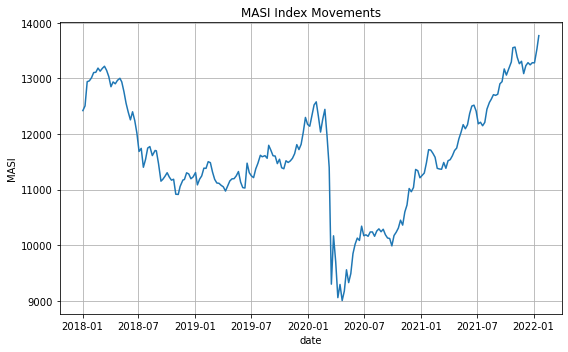

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(stocks_df.index, stocks_df["MASI"])
ax.grid()
ax.set_title('MASI Index Movements')
ax.set_ylabel('MASI')
ax.set_xlabel('date')
fig.tight_layout();

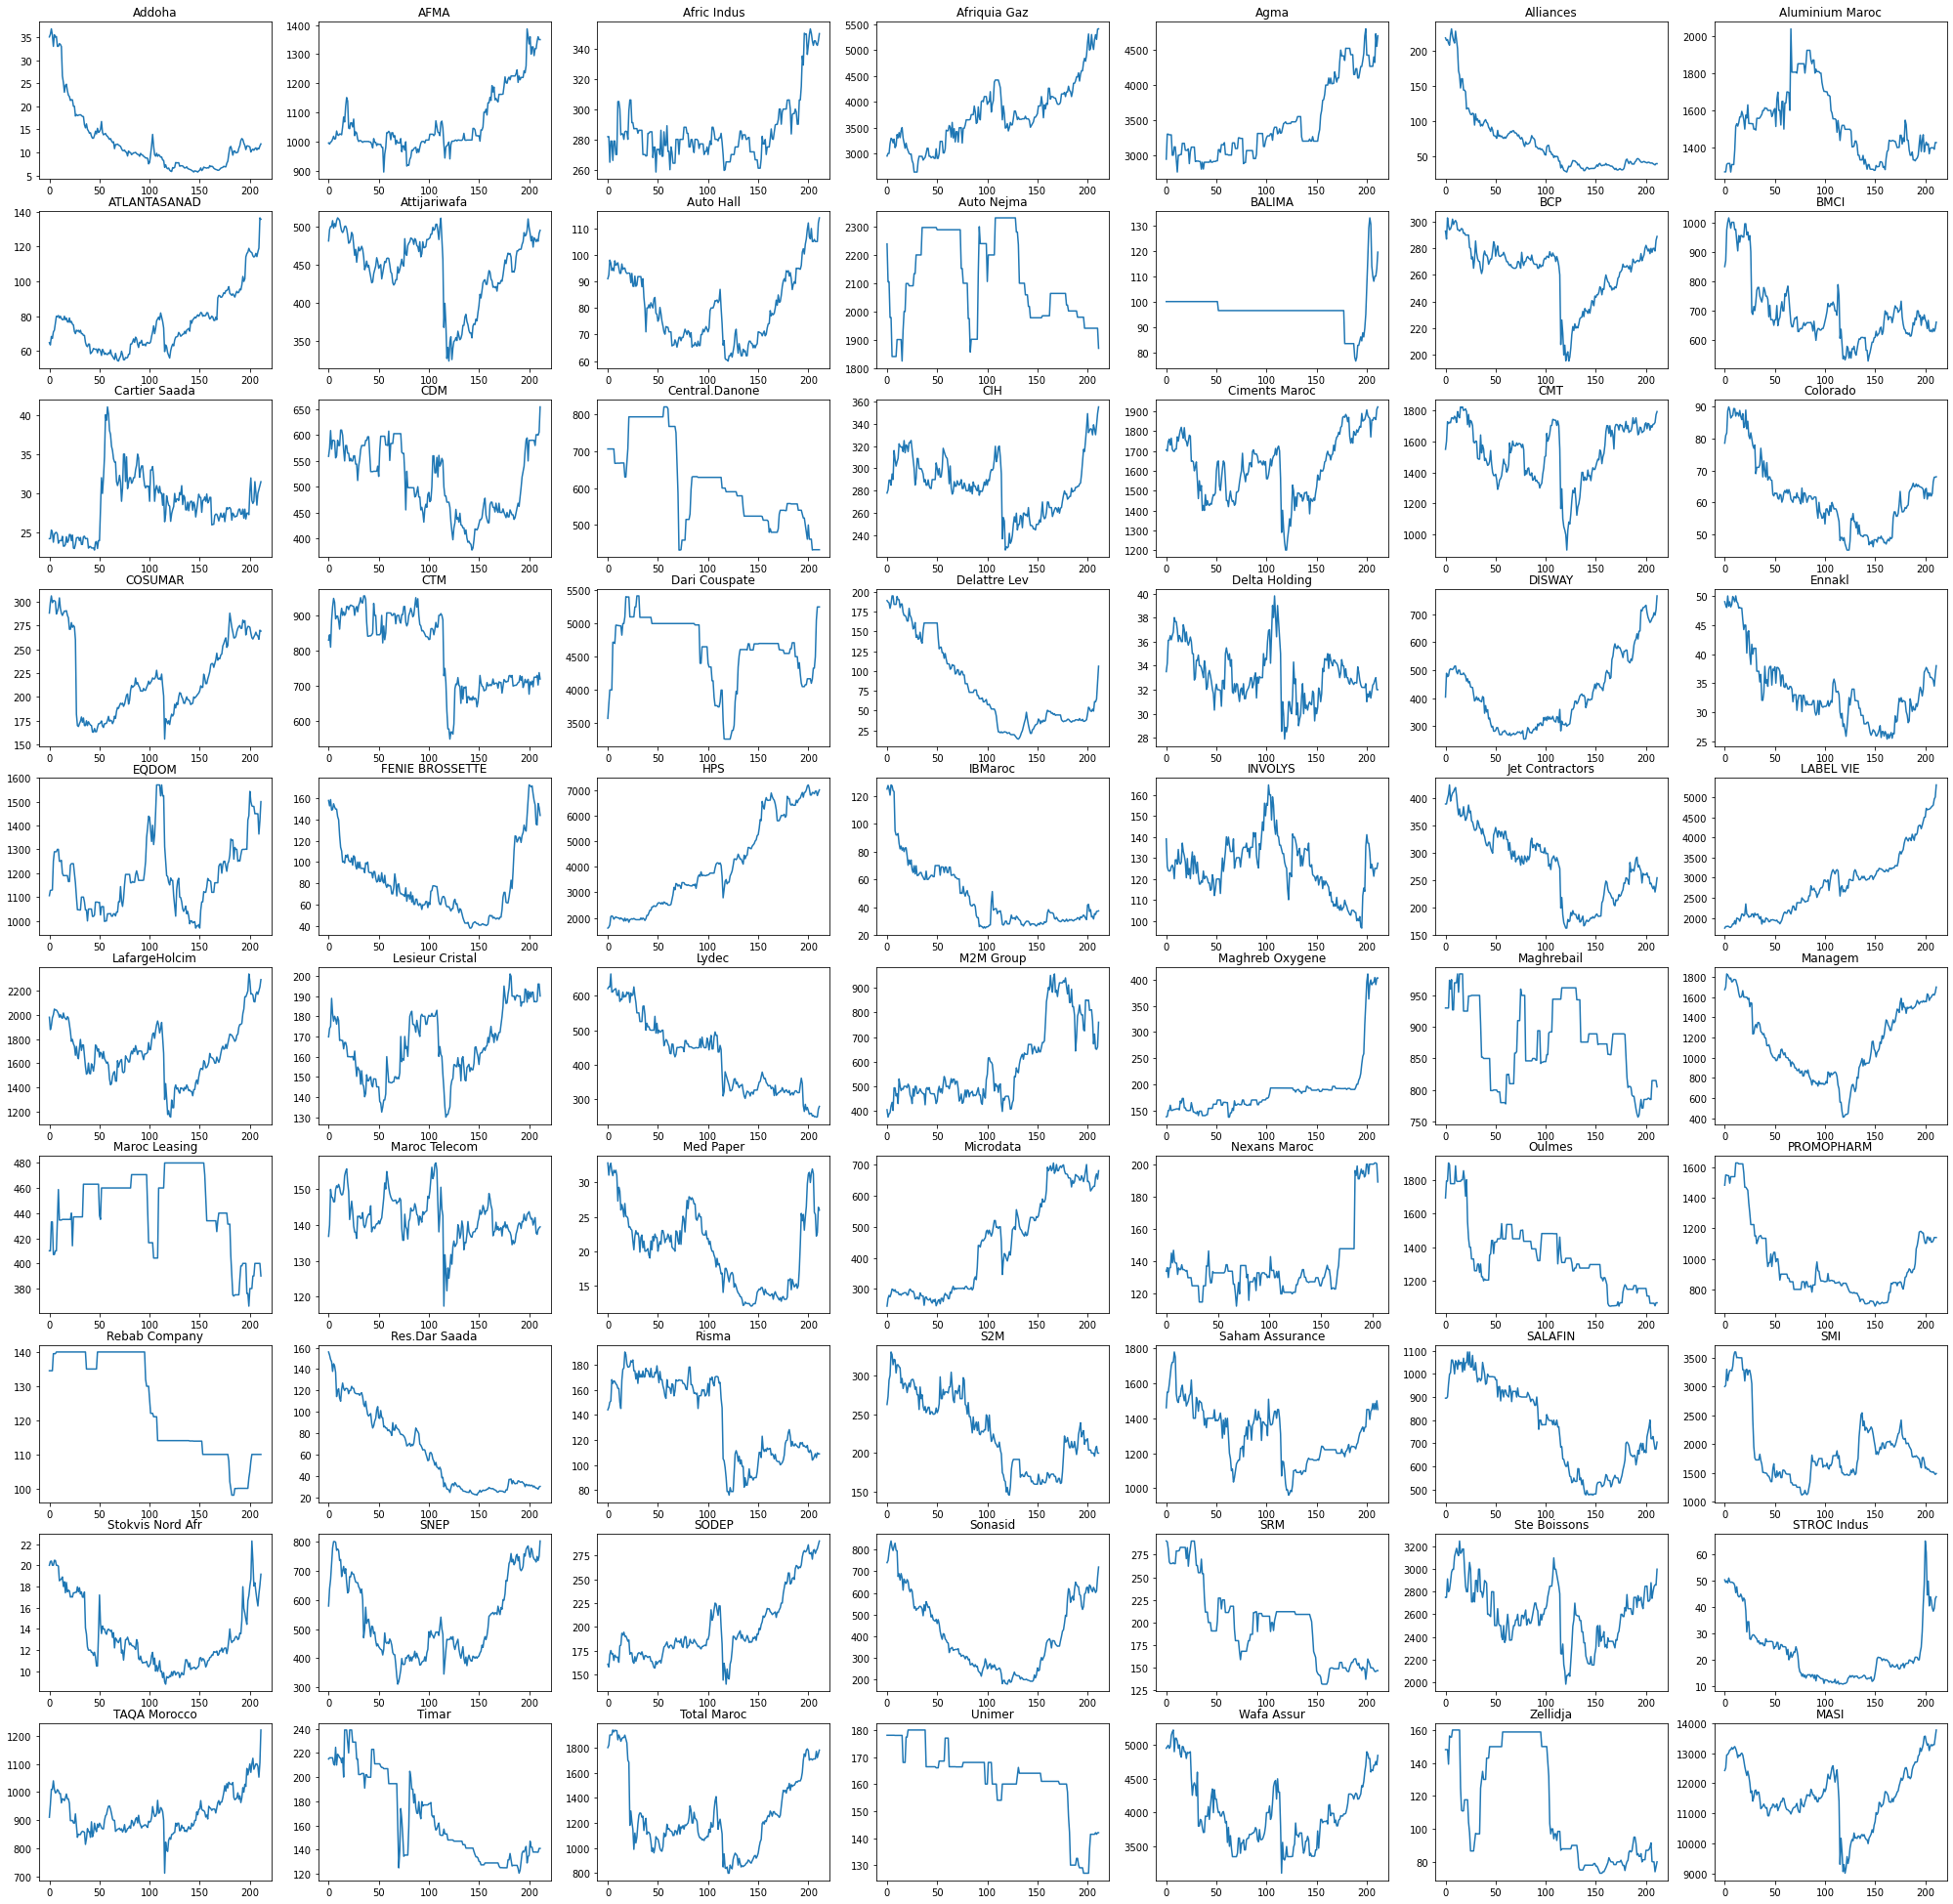

In [16]:
cols = stocks_df.columns

fig, axs = plt.subplots(10,7,figsize=(35,35))
for i in range(10):
    for j in range(7):
        axs[i, j].plot(stocks_df[cols[i*7+j]].values)
        axs[i, j].set_title(cols[i*7+j])
plt.show()

In [17]:
stocks_df.T

date,2018-01-02,2018-01-09,2018-01-16,2018-01-23,2018-01-30,2018-02-06,2018-02-13,2018-02-20,2018-02-27,2018-03-06,...,2021-11-16,2021-11-23,2021-11-30,2021-12-07,2021-12-14,2021-12-21,2021-12-28,2022-01-04,2022-01-12,2022-01-18
Addoha,35.0500,35.6100,36.8000,35.4600,33.0000,35.5000,35.0000,35.1500,33.0000,33.0100,...,10.5000,10.7000,10.4500,10.8000,10.9900,10.5500,10.9000,10.7500,11.400,11.8400
AFMA,995.0000,991.0000,998.0000,1000.0000,1008.0000,1018.0000,1008.0000,1010.0000,1036.0000,1023.0000,...,1300.0000,1325.0000,1325.0000,1295.0000,1319.0000,1319.0000,1344.0000,1360.0000,1350.000,1350.0000
Afric Indus,281.8000,281.8000,264.9000,278.9000,278.8500,266.1000,278.9000,278.9000,270.0000,270.0000,...,352.9000,350.0000,345.0000,342.0000,345.0000,345.0000,343.0000,342.0000,345.000,349.7500
Afriquia Gaz,2950.0000,3000.0000,3000.0000,3190.0000,3293.0000,3275.0000,3205.0000,3276.0000,3111.0000,3150.0000,...,5000.0000,5025.0000,5300.0000,5100.0000,5011.0000,5200.0000,5298.0000,5205.0000,5404.000,5410.0000
Agma,2943.0000,3300.0000,3300.0000,3290.0000,3290.0000,3290.0000,3000.0000,3000.0000,3119.0000,3118.0000,...,4425.0000,4266.0000,4266.0000,4266.0000,4266.0000,4400.0000,4321.0000,4730.0000,4550.000,4702.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total Maroc,1800.0000,1820.0000,1900.0000,1900.0000,1902.0000,1940.0000,1925.0000,1938.0000,1935.0000,1935.0000,...,1710.0000,1710.0000,1701.0000,1710.0000,1710.0000,1710.0000,1770.0000,1720.0000,1750.000,1780.0000
Unimer,178.0500,178.0500,178.0500,178.0500,178.0500,178.0500,178.0500,178.0500,178.0000,178.0000,...,136.0000,141.4000,141.4000,141.4000,141.4000,141.4000,142.0000,141.4000,142.000,142.0000
Wafa Assur,4950.0000,4975.0000,4995.0000,4950.0000,4974.0000,5140.0000,5190.0000,5220.0000,4900.0000,5100.0000,...,4800.0000,4800.0000,4600.0000,4630.0000,4620.0000,4700.0000,4700.0000,4756.0000,4707.000,4845.0000
Zellidja,148.1000,148.1000,148.1000,139.2500,156.4000,155.7000,155.7000,160.0000,160.0000,160.0000,...,87.0000,87.5000,89.0000,91.5000,80.2000,80.0000,80.0000,74.0000,76.950,80.0200


In [18]:
ts = np.array(stocks_df.T).reshape(stocks_df.T.shape[0], stocks_df.T.shape[1], 1)
ts = TimeSeriesScalerMinMax().fit_transform(ts)

In [19]:
km = TimeSeriesKMeans(n_clusters=8, random_state=0, metric = 'dtw')
y_pred = km.fit_predict(ts)

In [20]:
clusters_df = pd.DataFrame({'Company\'s stock':stocks_df.columns, 'Cluster': y_pred})

In [21]:
clusters_df

,Company's stock,Cluster
0,Addoha,2
1,AFMA,4
2,Afric Indus,7
3,Afriquia Gaz,4
4,Agma,4
...,...,...
65,Total Maroc,5
66,Unimer,3
67,Wafa Assur,5
68,Zellidja,6


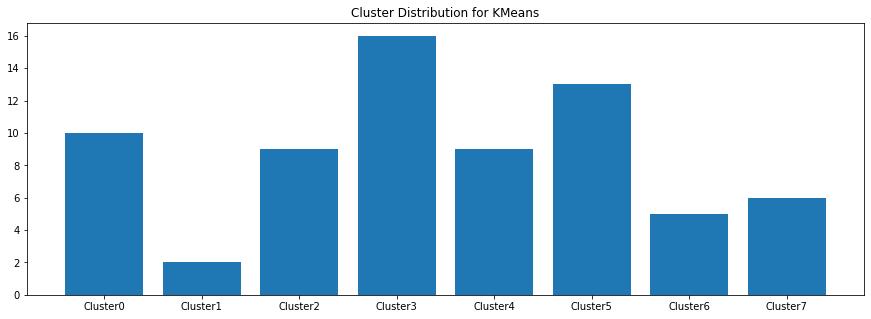

In [22]:
cluster_c = clusters_df["Cluster"].value_counts().sort_index()
cluster_n = [f"Cluster{str(i)}" for i in range(8)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c)
plt.show()

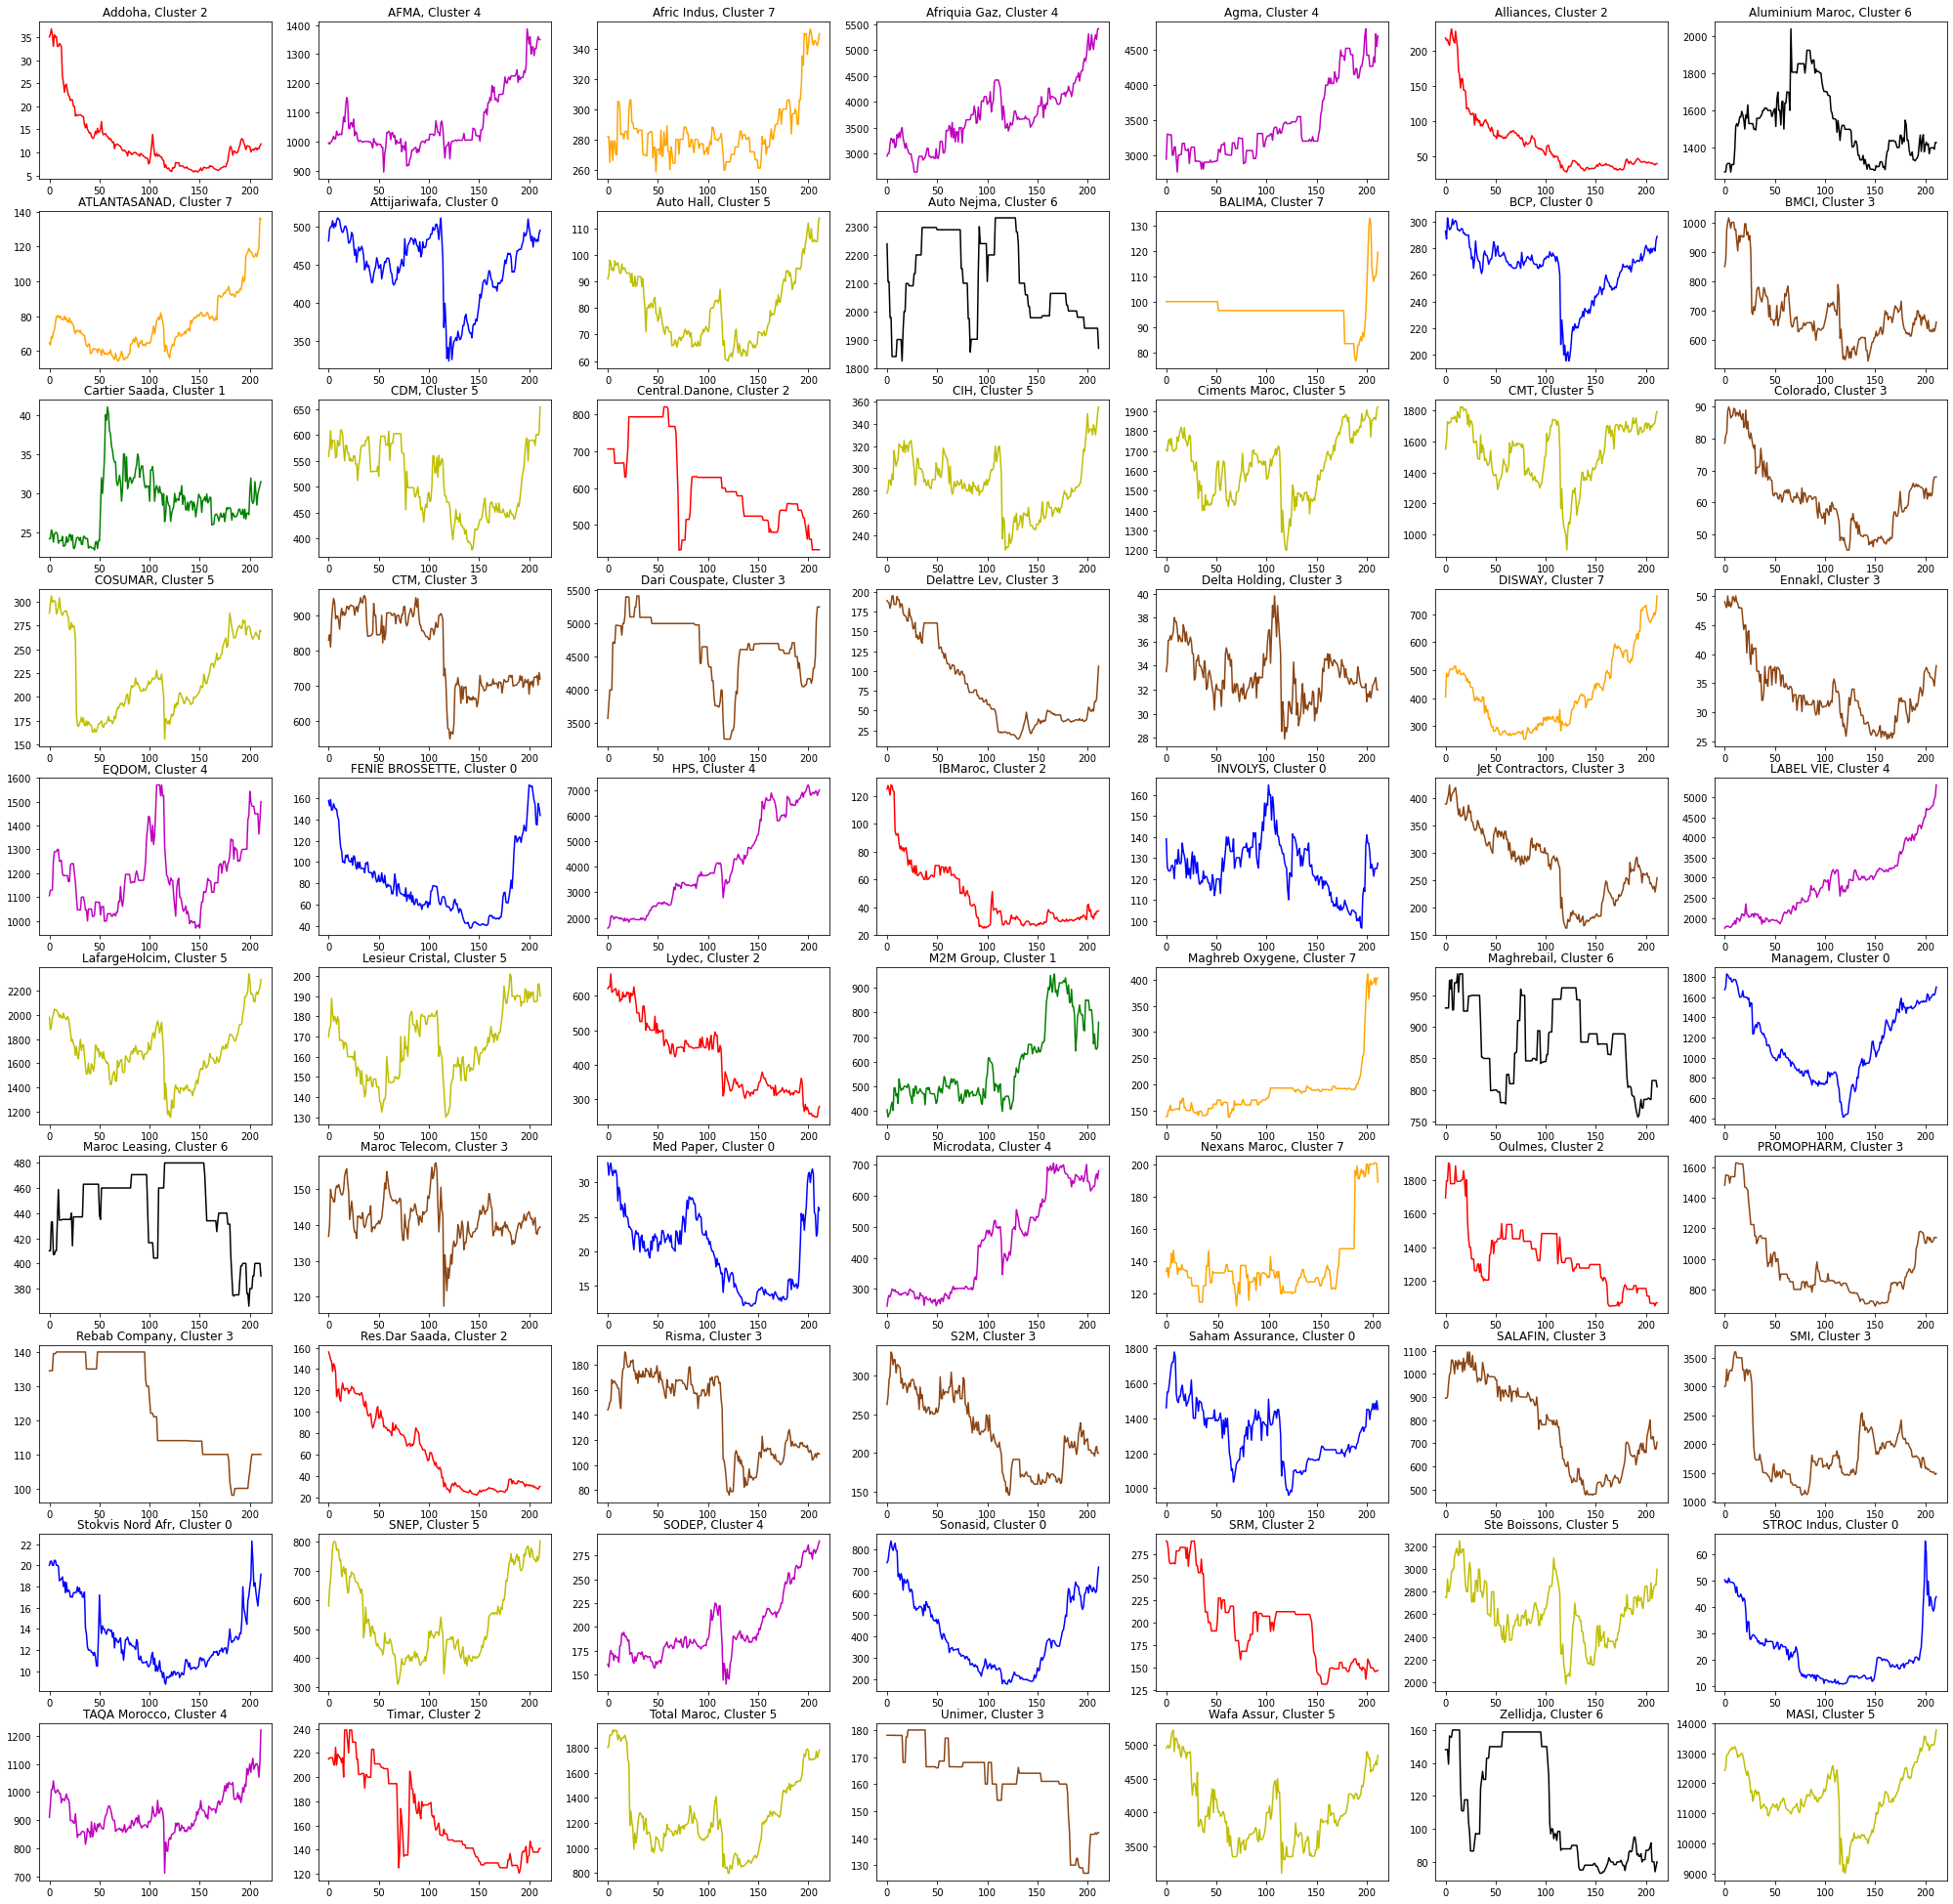

In [23]:
colors = ['b', 'g','r', 'saddlebrown', 'm', 'y', 'k', 'orange']

fig, axs = plt.subplots(10,7,figsize=(35,35))
for i in range(10):
    for j in range(7):
        axs[i, j].plot(stocks_df[cols[i*7+j]].values, color = colors[y_pred[i*7+j]])
        axs[i, j].set_title(f"{cols[i*7+j]}, Cluster {y_pred[i*7+j]}")
plt.show()